In [1]:
from silo_to_yt import *
import sys
import pickle
yt.set_log_level("ERROR")

In [2]:
data_path = '/mnt/massive-stars/data/thomas_simulations/wr140-sims/covertex_start/red_z_res/wr140-mhd-l7n256/'
# data_path = "/mnt/massive-stars/data/thomas_simulations/wr140-sims/covertex_start/orig_res/wr140-hydro-cool-n128/"
evolution = make_snapshots(data_path)
# print(evolution[0])
# ts = get_ts(evolution[202:203], quantities=["density"])
ds = get_ds(evolution[280], quantities=["density"])
ds.field_list

Info from silo files:
Basename of silo files: wr140_mhd_cool_d3l7n256
Simulation Info: 7 levels
Number of snapshots: 285


[('gas', 'density')]

# Slice Plots


In [3]:
slc = yt.SlicePlot(ds, "z", "windtr")
slc.set_log("windtr", False)
slc.set_cmap("windtr", "gray")
slc.set_zlim("windtr", 0, 1)
# slc.zoom(8)
slc.annotate_timestamp()
slc.show()

YTFieldNotFound: Could not find field ('unknown', 'windtr') in AMRGridData.

In [56]:
slc = yt.SlicePlot(ds, 'z', 'density_squared')
slc.annotate_timestamp(corner='upper_left', time_format='t = {time:.2f} yr', time_unit='yr', redshift=False, draw_inset_box=True)
slc.set_log('density_squared', True)
slc.set_cmap('density_squared', 'viridis')
# slc.zoom(16)
# slc.annotate_streamlines('magnetic_field_x', 'magnetic_field_y', density=2, factor=1, color='black', linewidth=0.5)
# slc.set_figure_size(4)
# slc.set_zlim('density', 1e-18, 1e-14)
# slc.annotate_line_integral_convolution('magnetic_field_x', 'magnetic_field_y', alpha=0.5)
# slc.annotate_quiver('velocity_x', 'velocity_y', factor=1, scale=0.1, alpha=0.5)
# slc.annotate_sphere([0.5, 0.5, 0.5], radius=0.05)

slc.show()

YTFieldNotFound: Could not find field ('unknown', 'density_squared') in AMRGridData.

In [7]:
# slc = yt.SlicePlot(ds, "z", "windtr")
# slc.zoom(8)
# slc.set_cmap("windtr", "coolwarm")
# slc.set_log("windtr", False)
# slc.set_figure_size(4)
# slc.set_colorbar_label("windtr", "")
# slc.annotate_title("Wind Tracer")
# slc.show()

# Projection Plots

In [70]:
# prj = yt.ProjectionPlot(ds, "z", "density")
# prj.set_log("density", True)
# prj.set_cmap("density", "viridis")
# prj.set_figure_size(4)
# # prj.zoom(32)
# # prj.annotate_grids()
# prj.show()


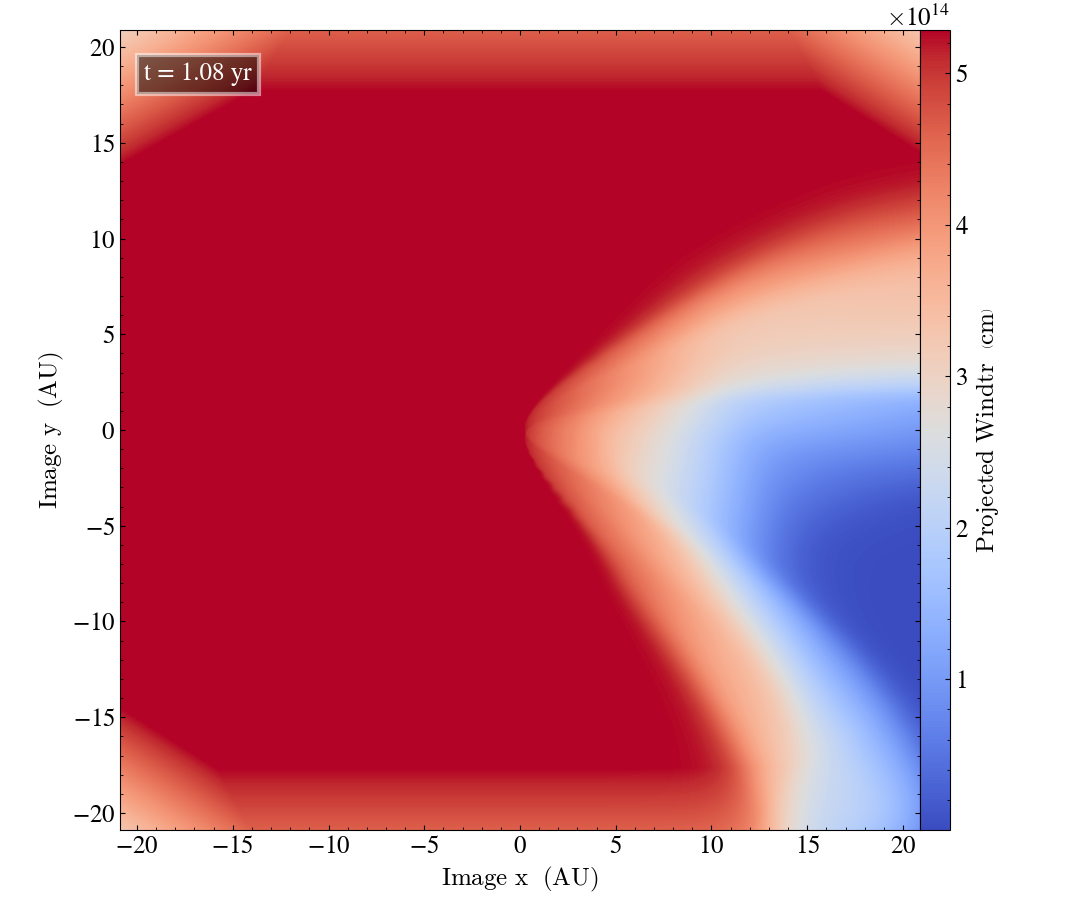

In [94]:
prj = yt.OffAxisProjectionPlot(ds, normal = [-0.591,0.588,0.552], fields='windtr', north_vector=[1,0,0])
prj.set_log('windtr', False)
prj.zoom(0.5)
prj.set_cmap('windtr', 'coolwarm')
prj.annotate_timestamp(corner='upper_left', time_format='t = {time:.2f} yr', time_unit='yr', redshift=False, draw_inset_box=True)
# prj.set_figure_size(4)
# prj.set_zlim('wind', 1e-5, 1e-1)
prj.show()


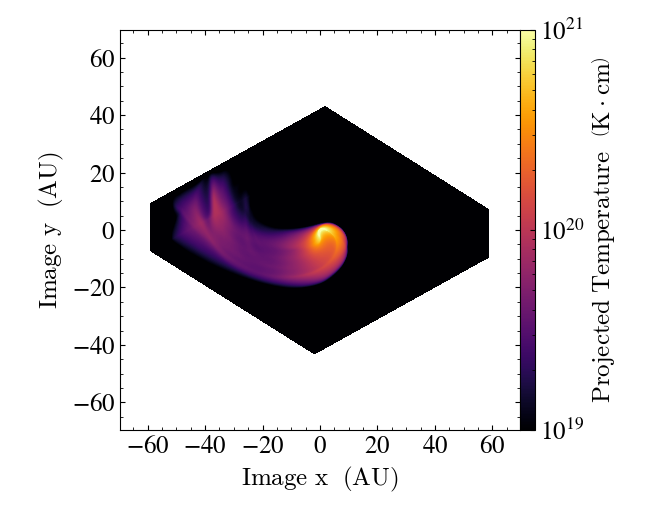

In [39]:
prj = yt.OffAxisProjectionPlot(ds, normal = [-0.591,0.588,0.552], fields='temperature', north_vector=[1,0,0])
# prj.set_log('temperature', True)
prj.zoom(0.15)
prj.set_cmap('temperature', 'inferno')
prj.set_figure_size(4)
prj.set_zlim('temperature', 1e19, 1e21)
prj.show()

# Volume Rendering

In [198]:
# data_path = "/mnt/massive-stars/data/thomas_simulations/wr140-sims/covertex_start/orig_res/wr140-hydro-cool-n064/"
# evolution = make_snapshots(data_path)
# ds = get_ds(evolution[240], quantities=["density", "temperature", "velocity", "windtracer"])

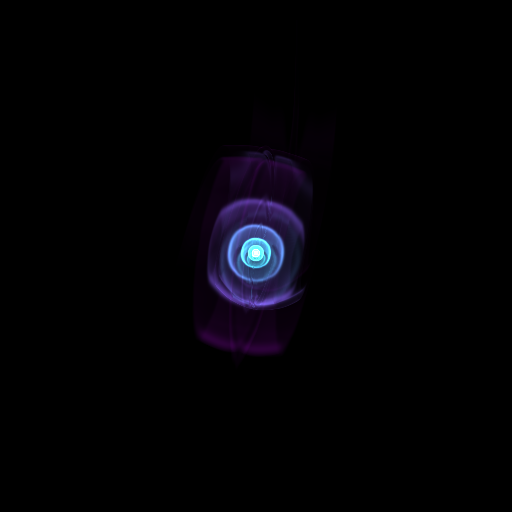

In [242]:
sc = yt.create_scene(ds, "density", lens_type='plane-parallel')

source = sc[0]
source.set_field(("gas", "density"))
source.set_log(True)
bounds = (1e-18,1e-14)

tf= yt.ColorTransferFunction(np.log10(bounds))

tf.add_layers(8, w=0.005, colormap="viridis")

source.tfh.tf = tf
source.tfh.bounds = bounds
source.tfh.plot("transfer_function.png", profile_field="density")

# sc.show(sigma_clip=4.0)

cam = sc.camera
cam.switch_orientation(normal_vector=[1, 1, 0], north_vector=[0, 1, 0])
cam.zoom(2)

for i in cam.iter_rotate(np.pi, 5):
    im = sc.render()
    sc.save("rotation_density%04i.png" % (i+1), sigma_clip=2.0)


# Streamlines

Streamlining: 100%|██████████| 100/100 [00:08<00:00, 11.58it/s]


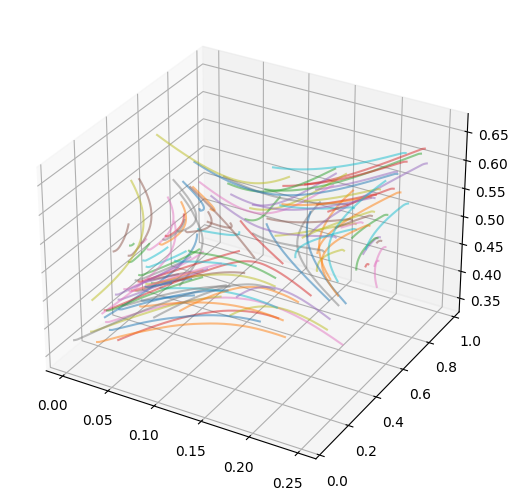

In [217]:
import matplotlib.pyplot as plt
import numpy as np
from mpl_toolkits.mplot3d import Axes3D

import yt
from yt.units import AU
from yt.visualization.api import Streamlines


c = ds.domain_center
N = 100
scale = ds.domain_width[0]
pos_dx = np.random.random((N, 3)) * scale - scale / 2.0
pos = c + pos_dx

# Create streamlines of the 3D vector velocity and integrate them through
# the box defined above
streamlines = Streamlines(
    ds,
    pos,
    ("gas", "velocity_x"),
    ("gas", "velocity_y"),
    ("gas", "velocity_z"),
    length=30.0 * AU,
    get_magnitude=True,
)
streamlines.integrate_through_volume()

# Create a 3D plot, trace the streamlines through the 3D volume of the plot
fig = plt.figure()
ax = Axes3D(fig, auto_add_to_figure=False)
fig.add_axes(ax)
for stream in streamlines.streamlines:
    stream = stream[np.all(stream != 0.0, axis=1)]
    ax.plot3D(stream[:, 0], stream[:, 1], stream[:, 2], alpha=0.5)

# Save the plot to disk.
plt.savefig("streamlines2.png")


# 1D Profile Plots


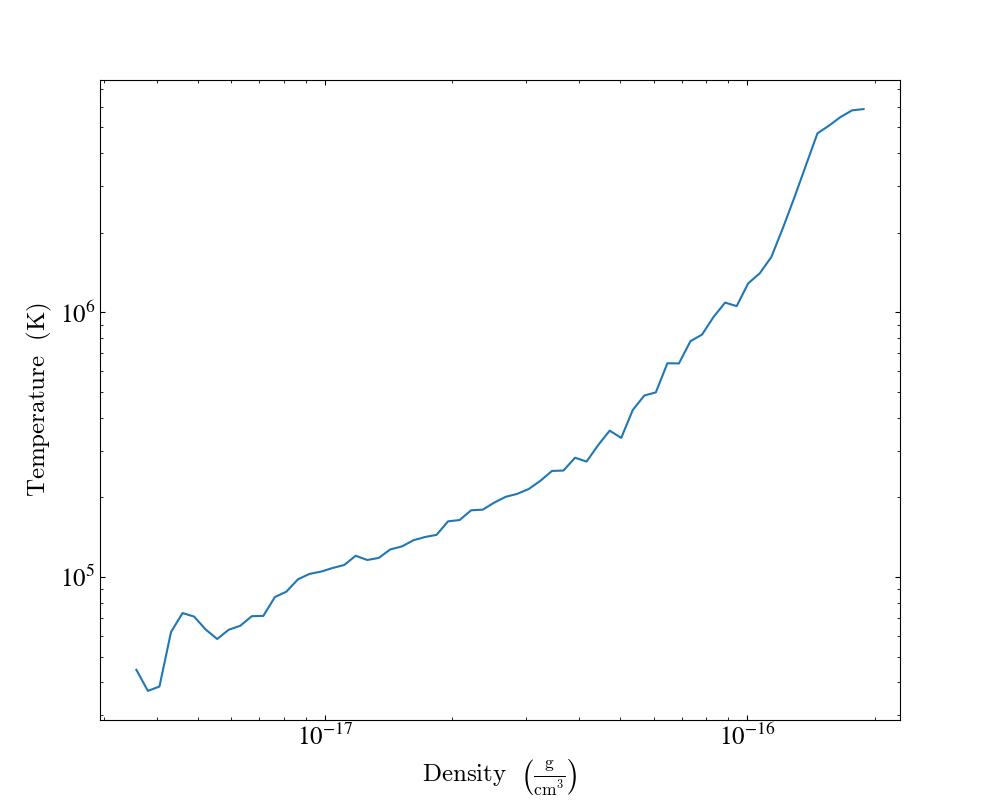

In [226]:
mysphere = ds.sphere([0.5,0.5,0.5], (0.1, "code_length"))
plot = yt.ProfilePlot(mysphere, "density", "temperature")
plot.show()